# Black-Scholes Model

## Theoretical Concepts

The Black-Scholes model is derived using Itô's lemma applied to a specific function of the Geometric Brownian Motion (GBM). The main idea is to consider the function representing the option price and then apply Itô's lemma to derive the stochastic differential equation (SDE) governing its dynamics.

### Geometric Brownian Motion (GBM) Dynamics

The underlying asset, $S_t$, follows a Geometric Brownian Motion (GBM) with drift $\mu$ and volatility $\sigma$:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

### Option Price Dynamics

The option price, denoted by $C(S, t)$, is a function of the underlying asset price $S$ and time $t$. The Black-Scholes model assumes a risk-free interest rate $r$.

The dynamics of the option price can be represented as the second-order Taylor expansion:

$$
dC = \frac{\partial C}{\partial t} dt + \frac{\partial C}{\partial S} dS + \frac{1}{2} \frac{\partial^2 C}{\partial S^2} (dS)^2
$$

Applying Itô's lemma to the option price function $C(S, t)$, we have $(dW)^2=dt$:

$$
dC = \frac{\partial C}{\partial t} dt + \frac{\partial C}{\partial S} dS + \frac{1}{2} \frac{\partial^2 C}{\partial S^2} \sigma^2 S^2 dt
$$

Now, substitute the GBM dynamics for $dS$:

$$
dC = \left(\frac{\partial C}{\partial t} + \mu S \frac{\partial C}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2}\right) dt + \sigma S \frac{\partial C}{\partial S} dW
$$

### Hedging Portfolio Dynamics

To make the option risk-free, set up a hedging portfolio with the proportion $\Delta$, representing the number of shares of the underlying asset to hold, and $M$, representing the amount invested in the risk-free asset. The dynamics of this portfolio can be given by:

$$
dM =  r M dt = dC - \Delta dS
$$

Substituting the dynamics of $dS$ into $dM$, we get:

$$
r M dt = dC - \Delta (\mu S dt + \sigma S dW)
$$

### Delta Hedging Strategy

Now, equating the two expressions for $dC$, we can determine the hedging strategy $\Delta$. 

$$
\Delta (\mu S dt + \sigma S dW) + r M dt = \left(\frac{\partial C}{\partial t} + \mu S \frac{\partial C}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2}\right) dt + \sigma S \frac{\partial C}{\partial S} dW
$$

We can construct a risk-free portfolio hedging agains uncertainty. Setting coefficients of $dW$ terms equal, we get:

$$
\Delta = \frac{\partial C}{\partial S}
$$

With this $\Delta$ the terms in $dW$ will cancel out:

$$
(\frac{\partial C}{\partial S}\mu S + r M)dt = \left(\frac{\partial C}{\partial t} + \mu S \frac{\partial C}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2}\right) dt
$$

If we choose $M = C -\frac{\partial C}{\partial S}S$ from the definition of the hedging portfolio, then the $dS$ terms in $dC$ will cancel out.

Thus, we obtain the Black-Scholes partial differential equation (PDE) for a European call option:

$$
\frac{\partial C}{\partial t} + rS\frac{\partial C}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} - rC = 0
$$

### PDE Solution

This PDE has the well-known closed-form analytical solution for a European call option:

$$
C(S, t) = S_0 N(d_1) - Ke^{-r(T - t)} N(d_2)
$$

where $d_1$ and $d_2$ are derived from the following equations:

$$
d_1 = \frac{\ln(S/K) + (r + \frac{1}{2}\sigma^2)(T - t)}{\sigma \sqrt{T - t}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T - t}
$$

Here, $N$ is the cumulative distribution function of the standard normal distribution. 

Notice that all the parameters except volatility $\sigma$ are given by the market. The expected market volatility will be estimated with the implied volatility newthon's method. 

### Call-Put Parity

In options trading, the **call-put parity** is a relationship between the prices of European call and put options with the same strike price (\(K\)) and expiration date (\(T\)). The call-put parity equation is given by:

$$
C - P = S - Ke^{-rT}
$$

This equation implies that the difference between the price of a European call option and a European put option with the same strike price and expiration date is equal to the difference between the current spot price of the underlying asset and the present value of the strike price.

### Deficiencies

The Black-Scholes model, revolutionary in options pricing, has limitations affecting its real-world applicability:

1. **Constant Volatility Assumption:** The model assumes constant volatility, overlooking real-world volatility variations.

2. **Normal Distribution of Returns:** Assumes normal distribution for returns, which may not hold during extreme market conditions.

3. **Neglect of Dividends:** Ignores dividends, potentially leading to overestimation of option prices.

4. **Constant Interest Rates:** Assumes a constant risk-free interest rate, not reflecting actual market dynamics.

5. **European-Style Options:** Designed for European-style options, potentially inaccurate for American-style options.

6. **Market Frictions, Transaction Costs, and Delta Hedging:** Does not consider transaction costs, market frictions, or discrete delta hedging.


While the Black-Scholes model set the foundation for option pricing, its assumptions limit accuracy in certain scenarios. Traders must be mindful of these deficiencies, considering advanced models for accurate option pricing in complex financial environments.



## Analytical Solution

Calculates the theoretical price of a European call or put option using the Black-Scholes model based on various input parameters.  

In [1]:
import numpy as np
import scipy.stats as st
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
K = 100
tau = 1
r = 0.05
S_0 = 100
sigma = 0.02
CP = "call"

In [3]:
def BS_Call_Option_Price(CP, S_0, K, sigma, tau, r):
    ''' Black-Scholes option price '''

    d1 = (np.log(S_0 / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    if str(CP).lower() == "call" or str(CP).lower() == "1":
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif str(CP).lower() == "put" or str(CP).lower() == "-1":
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S_0
    return value

Plots the **Call Value** for different **Spot Price** and **Time to expire**. Notice that Black-Sholes is not optimal for this computations since each point of the surface requires an individual value calculation.

In [4]:
Ngrid = 20
time = np.linspace(0.25, 2, num=Ngrid)[::-1]
spot = np.linspace(80, 120, num=Ngrid)
V = np.zeros([Ngrid, Ngrid])

for i in range(len(spot)):
    for j in range(len(time)):
        V[i, j] = BS_Call_Option_Price(CP, spot[i], K, sigma, time[j], r)

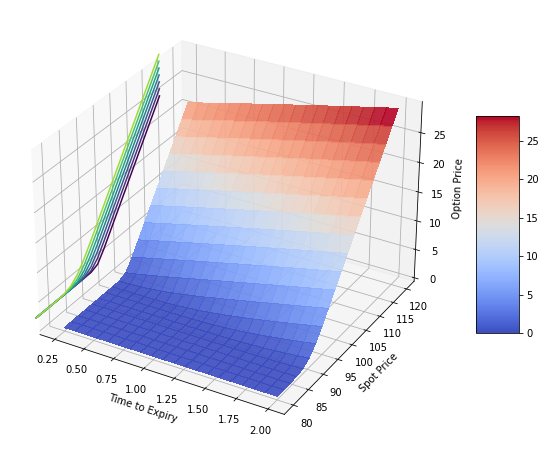

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,8))
T, S = np.meshgrid(time, spot)
surf = ax.plot_surface(T, S, V, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha=0.9)
ax.contour(T, S, V, zdir='x', offset=0)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Time to Expiry')
ax.set_ylabel('Spot Price')
ax.set_zlabel('Option Price')
plt.show()

## Implied Volatility

The goal is to find the implied volatility $\sigma$ of a call option given its market price $V_{\text{market}}$. The Black-Scholes model is employed to calculate the theoretical call option price $BS(\sigma)$. The iterative process involves adjusting the implied volatility until the model's price matches the observed market price.

### Newton's Method
The objective function is to minimize the difference between the market price ($V_{\text{market}}$) and the Black-Scholes call option price ($BS(\sigma)$). The difference is defined as $g(\sigma) = BS(\sigma) - V_{\text{market}}$.

Using the first-order Taylor expansion of $g(\sigma)$.
$$
g(\sigma_{n+1}) \approx g(\sigma_n) + g'(\sigma_n)(\sigma_{n+1} - \sigma_n)
$$

The Newton-Raphson iteration formula gives the iterative update of implied volatility ($\sigma$) for finding the root of a differentiable function f(x)=0:
$$
\sigma_{n+1} = \sigma_n - \frac{BS(\sigma_n) - V_{\text{market}}}{\text{Vega}(\sigma_n)} 
$$
where $\text{Vega}(\sigma_n)$ is the derivative of the Black-Scholes call option price with respect to volatility.

The iteration continues until the error is below a specified tolerance. Newton's method converges rapidly if the initial guess of implied volatility is close to the true root.

In [6]:
sigmaInit = 0.02
V_market = 5

In [7]:
def vega(S_0, K, sigma, tau, r):
    ''' Calculates the value of vega(sigma) '''

    d2 = (np.log(S_0 / float(K)) + (r - 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    vega = K * np.exp(-r * tau) * st.norm.pdf(d2) * np.sqrt(tau)
    return vega

In [8]:
def ImpliedVolatility(CP, S_0, K, sigma, tau, r, V_market):
    ''' Calculates the implied volatility using Newtons Method '''

    error = 1e10
    while error > 10e-10:
        g = BS_Call_Option_Price(CP, S_0, K, sigma, tau, r) - V_market
        g_prim = vega(S_0, K, sigma, tau, r)
        sigma_new = sigma - g / g_prim
        error = abs(g)
        sigma = sigma_new
    return sigma

In [18]:
print(f'''Implied volatility is {round(ImpliedVolatility(CP, S_0, K, sigmaInit, tau, r, V_market), 4)} for  
    strike K={K},
    maturity T={tau}, 
    interest rate r={r},
    initial stock S_0={S_0} 
    and market value={V_market}:
''')

Implied volatility is 0.0354 for  
    strike K=100,
    maturity T=1, 
    interest rate r=0.05,
    initial stock S_0=100 
    and market value=5:



### Volatility Surface

The implied volatility can vary across different strike prices and maturities, leading to patterns known as the "volatility smile" and "volatility skew."

#### Smile Pattern

The volatility smile refers to the phenomenon where implied volatility tends to be higher for options that are either deep in-the-money or deep out-of-the-money, compared to at-the-money options.
In a graphical representation, this creates a smile-like shape when plotting implied volatility against strike prices for a given maturity.

#### Skew Pattern

The volatility skew describes the slope of implied volatility across different strike prices for a given maturity.
- A "positive skew" means that implied volatility is higher for out-of-the-money options compared to at-the-money options. This is common in equity markets.
- A "negative skew" means that implied volatility is higher for in-the-money options compared to at-the-money options. This is more prevalent in foreign exchange markets.


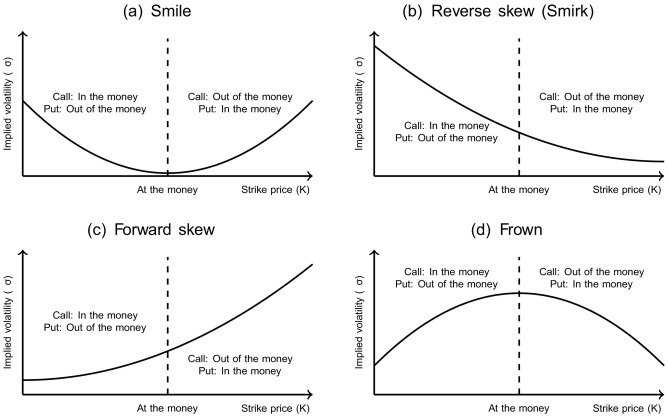